# Potential due to a planet with square shape integrating over the boundary

We want to evaluate the potential due to an
arbitrary distribution of mass density.


$$G(\mathbf{r}, \boldsymbol{\zeta})
   = \frac{1}{2\pi}\ln|\mathbf{r} - \boldsymbol{\zeta}|\, .$$
   
   
The flow is given by

$$F(\mathbf{r}, \boldsymbol{\xi})
   = -\frac{\hat{\mathbf{r}}}{2\pi |\mathbf{r} - \boldsymbol{\xi}|} \, ,$$
   
with $\hat{\mathbf{r}}$ a unit vector from $\mathbf{r}$ to
$\boldsymbol{\xi}$.


We can compute the potential/field given by a distribution of
mass density $\rho(\mathbf{x})$ adding up the individual
point contributions, that is, with an integral.

$$\phi(\boldsymbol{\xi})
= \int\limits_\Omega G(\mathbf{x}, \boldsymbol{\xi})
  \rho(\mathbf{x})\, \mathrm{d}\Omega(\mathbf{x})$$
  
If we consider that the domain is triangulated we can express the integral as

$$\phi(\boldsymbol{\xi})
= \sum_{e}\int\limits_{\Omega_e} G(\mathbf{x}, \boldsymbol{\xi})
  \rho(\mathbf{x})\, \mathrm{d}\Omega(\mathbf{x})\, .$$
  
Let's consider that the variation of $\rho$ and $G$ is negligible over
each triagle. Thus, we obtain

\begin{align}
\phi(\boldsymbol{\xi})
&\approx \sum_{e} G(\mathbf{x}_m, \boldsymbol{\xi}) \rho(\mathbf{x}_m) \int\limits_{\Omega_e}\mathrm{d}\Omega(\mathbf{x})\\
&= \sum_{e} G(\mathbf{x}_m, \boldsymbol{\xi}) \rho(\mathbf{x}_m) V_e\, ,
\end{align}

where $\mathbf{x}_m$ refers to the centroid of each triangle.

If we consider that the density is the same over the domain, we get

$$\phi(\boldsymbol{\xi})
\approx \rho \sum_{e} G(\mathbf{x}_m, \boldsymbol{\xi}) V_e\, .$$


## Integral over the boundary

In the case of $\rho(\boldsymbol{\xi})$, that is

$$\nabla^2 \rho(\boldsymbol{\xi}) = 0\, ,$$

we can rewrite the volume integral as a surface one
invoking Green's identity.

If we use the auxiliar function

$$G^*(\mathbf{x}, \boldsymbol{\xi}) = \frac{r^2}{8 \pi}[1 - \log(r)]\, ,$$

with the property $\nabla^2 G^*(\mathbf{x}, \boldsymbol{\xi}) = G(\mathbf{x}, \boldsymbol{\xi})$, we can rewrite the integral as

$$\int\limits_VG(\mathbf{x}, \boldsymbol{\xi}) f(\mathbf{x}) dV(\mathbf{x}) =
\int\limits_S\left(\frac{\partial G^*}{\partial \hat{n}}\rho
- G^*\frac{\partial \rho}{\partial \hat{n}}\right)dS(\mathbf{x})\, ,$$

where

$$\frac{\partial G^*}{\partial \hat{n}}
= \frac{\mathbf{r}\cdot\hat{n}}{8\pi}(1 - 2\log r)\, .$$


In our previous example, $\rho(\mathbf{x}) = \rho$, and its derivative is
0. Thus

$$\int\limits_V G(\mathbf{x}, \boldsymbol{\xi}) f(\mathbf{x}) dV(\mathbf{x}) =
\int\limits_S\frac{\partial G^*}{\partial \hat{n}}\rho dS(\mathbf{x})\, ,$$

and

\begin{align}
\phi(\boldsymbol{\xi})
&= \int\limits_S\frac{\partial G^*}{\partial \hat{n}}\rho dS(\mathbf{x})\\
&=\rho \sum_e \int\limits_S\frac{\partial G^*}{\partial \hat{n}}dS(\mathbf{x})\, .
\end{align}

Assuming that the integrand is constant in the element, we get
\begin{align}
\phi(\boldsymbol{\xi})
&\approx \rho \sum_e \frac{\partial G^*(\mathbf{x}_m, \boldsymbol{\xi})}{\partial \hat{n}_m} \int\limits_S dS(\mathbf{x})\\
&= \rho \sum_e \frac{\partial G^*(\mathbf{x}_m, \boldsymbol{\xi})}{\partial \hat{n}_m}L_e\, .
\end{align}

In [2]:
#%matplotlib widget

In [3]:
import numpy as np
from numpy import log, arctan2, pi, mean
from numpy.linalg import norm, solve
import matplotlib.pyplot as plt
import meshio

In [4]:
try:
    repo = "https://raw.githubusercontent.com/nicoguaro/matplotlib_styles/master"
    style = repo + "/styles/clean.mplstyle"
    plt.style.use(style)
except:
    pass

In [7]:
mesh = meshio.read("files/square_bound.msh")
pts = mesh.points
lines = np.vstack([cells.data for cells in mesh.cells[0:4]])
tris = np.vstack([cells.data for cells in mesh.cells[4:9]])
x, y, _ = pts.T

ReadError: File files/square_bound.msh not found.

In [6]:
plt.figure()
plt.triplot(x, y, tris, lw=0.5, zorder=4)
plt.axis("image");

NameError: name 'x' is not defined

<Figure size 600x400 with 0 Axes>

In [6]:
def length_line(coords):
    """Compute length and normal to a line with given coordinates

    Parameters
    ----------
    coords : ndarray, float
        Coordinates for the nodes of the line.

    Returns
    -------
    area : float
        Area of the triangle
    """
    vec = coords[1, :] - coords[0, :]
    L = np.linalg.norm(vec)
    normal = np.array([vec[1], -vec[0]])/L
    return L, normal

In [7]:
potential = np.zeros_like(x)
field = np.zeros_like(pts[:, :2])

In [8]:
for line in lines:
    coords = pts[line]
    L, normal = length_line(coords)
    xm, ym, _ = np.mean(coords, axis=0)
    for cont, pt in enumerate(pts):
        pt_x, pt_y, _ = pt
        vec = np.array([pt_x - xm, pt_y - ym])
        r = np.linalg.norm(vec)
        pot = (1 - 2*np.log(r))* vec.dot(normal)/(8*np.pi)
        Ex = -(normal[0]*(1 - 2*np.log(r)) + vec.dot(normal)*vec[0]/r**2)/(8*np.pi)
        Ey = -(normal[1]*(1 - 2*np.log(r)) + vec.dot(normal)*vec[1]/r**2)/(8*np.pi)
        potential[cont] += L * pot
        field[cont, :] += L * Ex, L * Ey

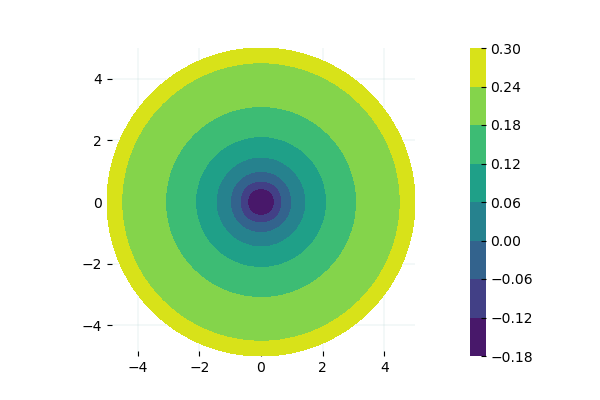

In [9]:
plt.figure()
plt.tricontourf(x, y, tris, potential, zorder=4)
plt.colorbar()
plt.axis("image");

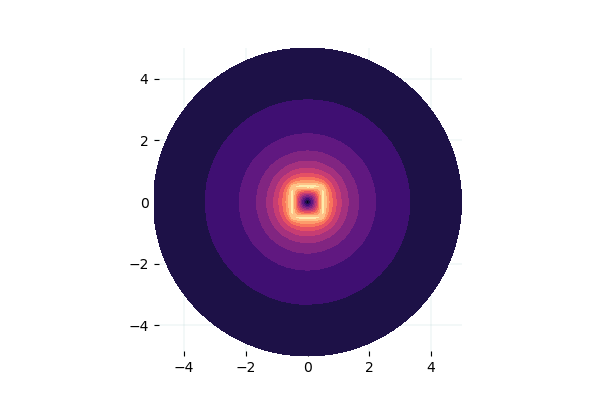

In [10]:
plt.figure()
plt.tricontourf(x, y, tris, np.linalg.norm(field, axis=1),
                12, cmap="magma", zorder=4)
plt.axis("image");

In [11]:
mesh.point_data["potential"] = potential

In [12]:
import os

folder = "./files/"
if os.path.isdir(folder):
    pass
else:
    os.mkdir(folder)

mesh.write(folder + "square_bound.vtk")

Warning: VTK requires 3D vectors, but 2D vectors given. Appending 0 third component to gmsh:dim_tags.

Info: VTK format cannot write cell_sets. Converting them to cell_data...

Warning: 30 cells are not part of any cell set. Using default value -1.